<hr>

Notebook base para el trabajo final de la asignatura Inteligencia Artificial 2019_I.

<hr>

In [1]:
import os
import numpy as np

import tensorflow as tf

import keras
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


<hr>

## Visualizacion de algunas imagenes del dataset

In [2]:
train_normal_dir = os.path.join('chest_xray/train/NORMAL')
train_neumonia_dir = os.path.join('chest_xray/train/PNEUMONIA')

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_neumonia_names = os.listdir(train_neumonia_dir)
print(train_neumonia_names[:10])

['IM-0474-0001.jpeg', 'IM-0505-0001-0001.jpeg', 'NORMAL2-IM-1292-0001.jpeg', 'IM-0453-0001-0002.jpeg', 'NORMAL2-IM-0975-0001.jpeg', 'NORMAL2-IM-0727-0001.jpeg', 'IM-0538-0001.jpeg', 'NORMAL2-IM-1112-0001.jpeg', 'IM-0673-0001.jpeg', 'IM-0447-0001.jpeg']
['person45_bacteria_220.jpeg', 'person760_bacteria_2664.jpeg', 'person1358_virus_2339.jpeg', 'person583_bacteria_2408.jpeg', 'person725_bacteria_2627.jpeg', 'person519_virus_1038.jpeg', 'person1106_virus_1829.jpeg', 'person1077_virus_1787.jpeg', 'person564_bacteria_2344.jpeg', 'person1496_bacteria_3909.jpeg']


In [3]:
nrows = 4
ncols = 4

pic_index = 0

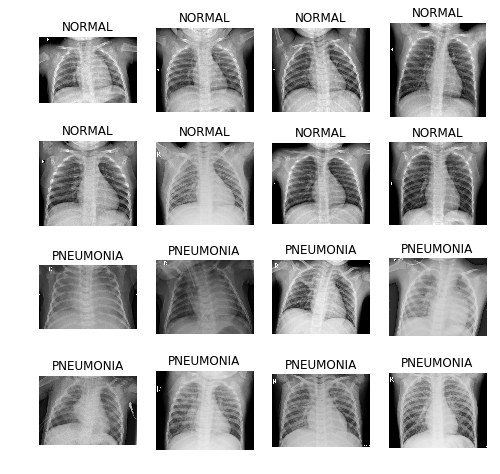

In [4]:
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[pic_index-8:pic_index]]
next_neumonia_pix = [os.path.join(train_neumonia_dir, fname) for fname in train_neumonia_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_neumonia_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    plt.title(img_path.split("/")[2])
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')

plt.show()

<hr>

## Lectura de las imagenes desde el disco duro

Para ello utilizaremos ImageDataGenerator. Note el parámetro __rescale__ que permite normalizar la imagen entre 0 y 1 desde la lectura.

In [45]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_dir = 'chest_xray/train/' # Carpeta donde se encuentran las imagenes de entrenamiento

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(28, 28),  # alterando este parametro podemos redimensionar las imagenes desde la lectura
        batch_size=128, # dejar fijo
        class_mode='binary') #clasificacion binaria

Found 5216 images belonging to 2 classes.


A continuacion, un modelo simple de red neuronal simple con dos capa Dense de 128 neuronas. Note que la capa final tiene una neurona de activacion sigmoide debido a que el problema de clasificación en binario.

In [46]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

In [47]:
model.compile(loss='binary_crossentropy',
              #optimizer=RMSprop(lr=0.001),
              optimizer = keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])

Debido a que utilizamos un generador (ImageDataGenerator) para cargar el dataset desde el disco, también necesitamos entrenar nuestro modelo utilizando __.fit_generator__.

In [48]:
history = model.fit_generator(train_generator, steps_per_epoch=8, epochs=5, verbose=1)

Epoch 1/5
8/8 [==============================] - 17s 2s/step - loss: 4.7601 - acc: 0.6943
Epoch 2/5
8/8 [==============================] - 17s 2s/step - loss: 4.0960 - acc: 0.7431
Epoch 3/5
8/8 [==============================] - 18s 2s/step - loss: 4.0790 - acc: 0.7441
Epoch 4/5
8/8 [==============================] - 18s 2s/step - loss: 3.9078 - acc: 0.7549
Epoch 5/5
8/8 [==============================] - 18s 2s/step - loss: 4.4838 - acc: 0.7188


In [ ]:
plt.plot(history.history['loss'])
plt.show()